In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [2]:
# ipykernal issue fixed by running below commands
# python -m pip uninstall pyzmq

# pip install pyzmq==25.1.2

In [3]:
df = pd.read_csv(filepath_or_buffer='data/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
cate_columns = df.select_dtypes(exclude=['int', 'float']).columns

In [11]:
cate_columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [12]:
numeric_col = df.select_dtypes(include=['int', 'float']).columns

In [13]:
numeric_col

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [14]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

In [15]:
df['average_score'] = df['total_score']/3

[]

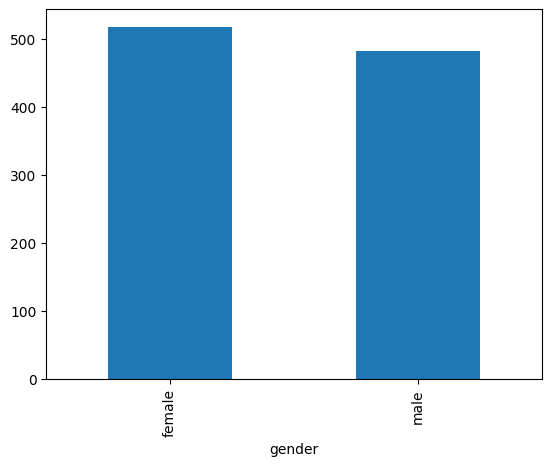

In [16]:
df['gender'].value_counts().plot(kind='bar')
sns.set_palette('dark')
plt.plot()

In [17]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [18]:
df['test preparation course'].replace('none', 'not completed', inplace=True)

C:\Users\Priya Bhaskar\AppData\Local\Temp\ipykernel_4716\2097041982.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['test preparation course'].replace('none', 'not completed', inplace=True)


In [19]:
df.groupby('test preparation course')['math score'].mean()

test preparation course
completed        69.695531
not completed    64.077882
Name: math score, dtype: float64

In [20]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [21]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

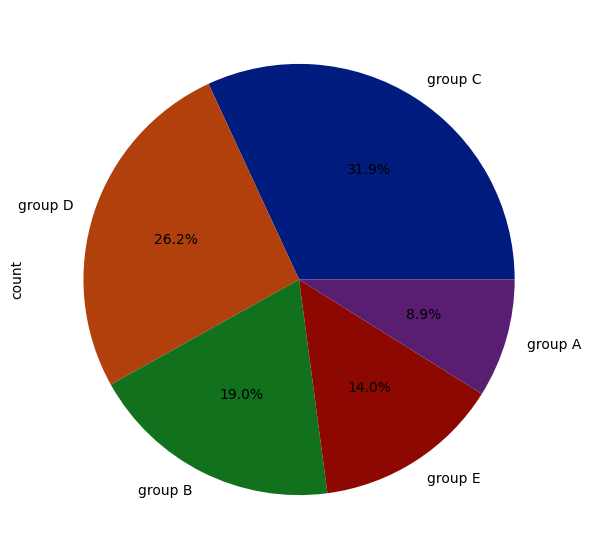

In [22]:
df['race/ethnicity'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 7))
plt.show()

In [23]:
sns.set_palette('viridis')

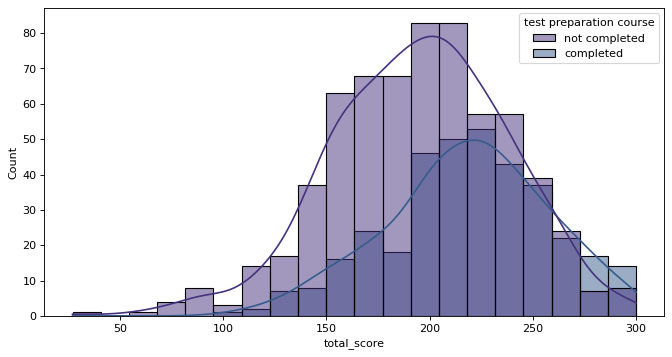

In [24]:
plt.figure(figsize=(10, 5), dpi=80)
sns.histplot(data=df, x='total_score', hue='test preparation course', bins=20, kde=True,)
plt.show()

both graphs are bell curve shaped. it is indicating a normal distribution. the distribution is student who did not complete the course is more spead out. 
the central tendency of the distribution who did not complete the course is lower than those who completed. that indicates that student who took the course have scored more as total score.

In [25]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [26]:
df.groupby('lunch')['total_score'].mean()

lunch
free/reduced    186.597183
standard        212.511628
Name: total_score, dtype: float64

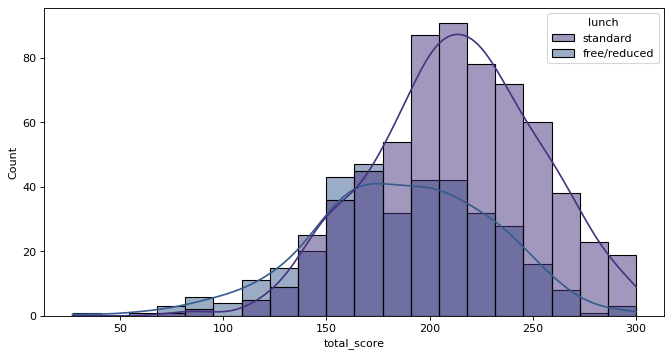

In [27]:
plt.figure(figsize=(10, 5), dpi=80)
sns.histplot(data=df, x='total_score', hue='lunch', bins=20, kde=True,)
plt.show()

Both distributions are bell-shaped, indicating a normal distribution, but the distribution for students with standard lunch is more concentrated in the higher score range compared to those with free/reduced lunch.
The peak (mode) of the distribution for students with standard lunch is higher than for those with free/reduced lunch. This suggests that students with standard lunch generally score higher on their tests.
The KDE for students with standard lunch is skewed towards higher scores, while the KDE for students with free/reduced lunch is more spread towards the lower scores.

<Axes: ylabel='count'>

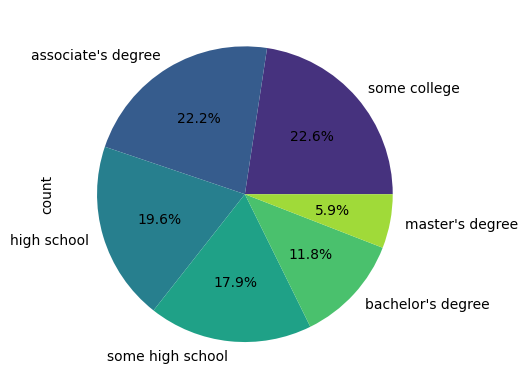

In [28]:
df['parental level of education'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [29]:
df.groupby('parental level of education')['total_score'].mean().sort_values()

parental level of education
high school           189.290816
some high school      195.324022
some college          205.429204
associate's degree    208.707207
bachelor's degree     215.771186
master's degree       220.796610
Name: total_score, dtype: float64

<Axes: ylabel='parental level of education'>

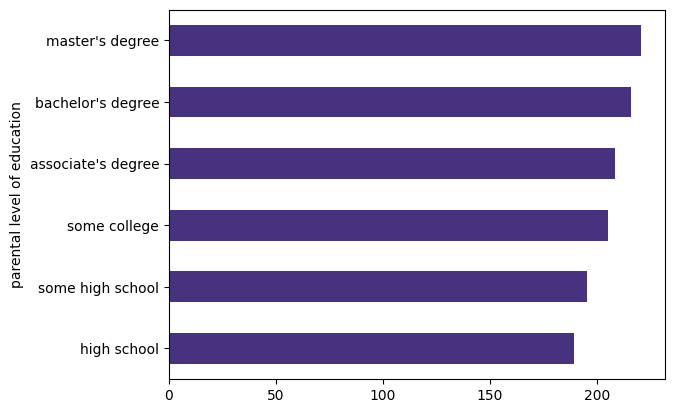

In [30]:
df.groupby('parental level of education')['total_score'].mean().sort_values().plot(kind='barh')

The above barplot indicates students whose parents have masters degree have scored higher and then bachelors degree and so on.
this shows that level of parental education has significant effect on student's education.

In [31]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

<Axes: ylabel='count'>

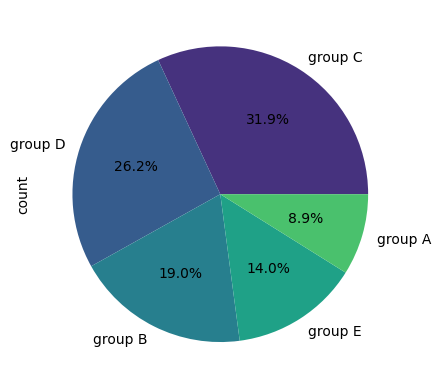

In [32]:
df['race/ethnicity'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [33]:
df.groupby('race/ethnicity')['total_score'].mean().sort_values()

race/ethnicity
group A    188.977528
group B    196.405263
group C    201.394984
group D    207.538168
group E    218.257143
Name: total_score, dtype: float64

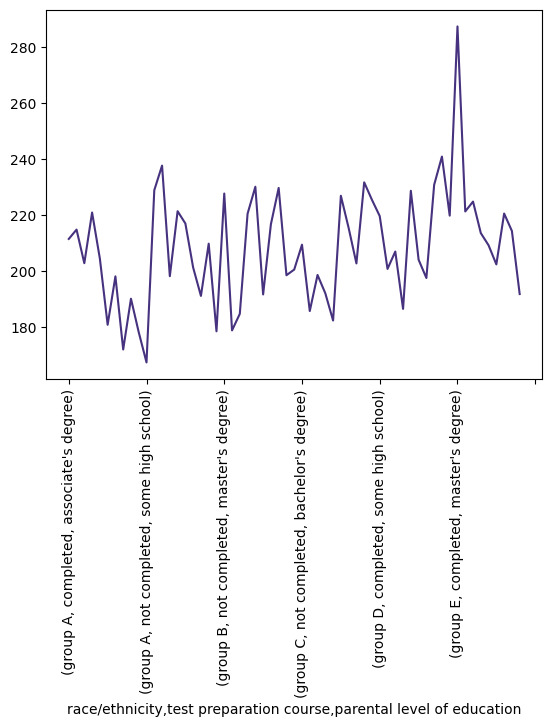

In [34]:
df.groupby(['race/ethnicity', 'test preparation course', 'parental level of education'])['total_score'].mean().plot(kind='line',)
plt.xticks(rotation=90)
plt.show()

The above graph indicates that Group E studnets were able to score highest because they completed the course and their parental level education has positive impact.

In [35]:
df.groupby(['gender'])['total_score'].mean()

gender
female    208.708494
male      197.512448
Name: total_score, dtype: float64

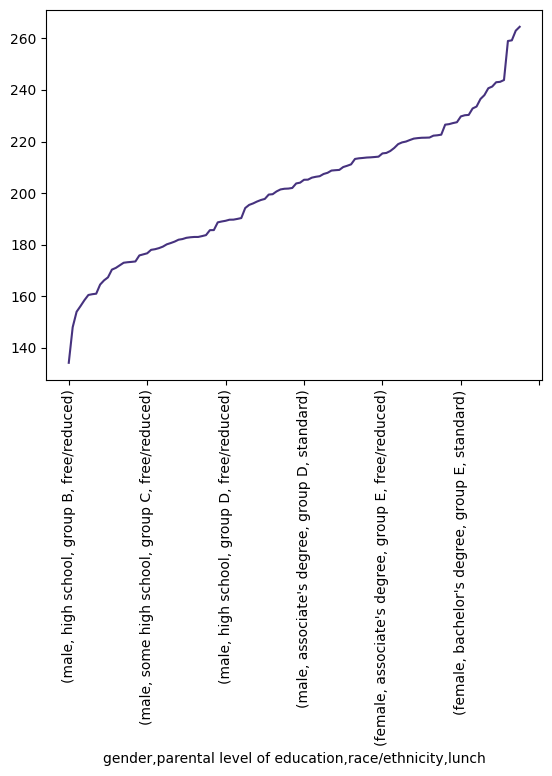

In [36]:
df.groupby(['gender', 'parental level of education', 'race/ethnicity', 'lunch'])['total_score'].mean().sort_values().plot(kind='line')
plt.xticks(rotation=90)
plt.show()